# THE SPARKS FOUNDATION     
Inspire, Innovate, & Integrate                       


# GRIP JANUARY 2022 Task#2 submission by Meena Pargain

# Prediction using Unsupervised ML

## Problem Statement:From the IRIS dataset predict the optimal number of clusters and represent them visually. 

In [69]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [70]:
# load the dataset
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
# check shape of the dataset
df.shape

(150, 5)

In [72]:
# cheking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**From the above information we can observe that there is no null values in the dataset.**

In [73]:
# Descriptive information of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
# check value counts of the species
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

**All the three species are distributed equally in the dataset.**

# Exploratory Data Analysis

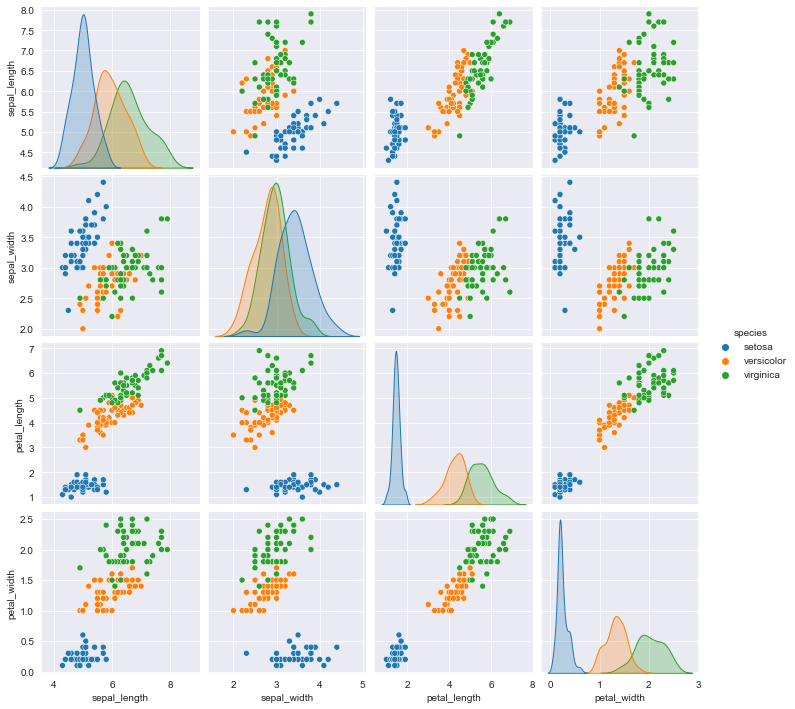

In [75]:
# Visualization of the data using pairplot
sns.pairplot(df,diag_kind='kde',hue='species');

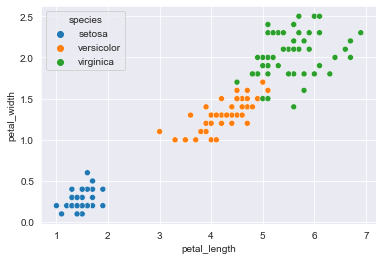

In [76]:
# Scatter plot between petal_length and petal_width
sns.scatterplot(df['petal_length'],df['petal_width'],hue=df['species']);

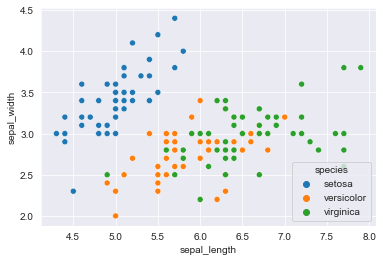

In [77]:
# Scatter plot between sepal_length and sepal_width
sns.scatterplot(df['sepal_length'],df['sepal_width'],hue=df['species']);

**From the above scatter plots we can observe that setosa can be identified easily.**
**Setosa has smaller petal_width,petal_length,sepal_length and greater sepal_width.**
**For versicolor and virginica its difficult to find out what is smaller and greater.**

# Model Building

In [78]:
# Dropping the variable which is not useful for the model building
df1=df.drop(['species'],axis=1)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


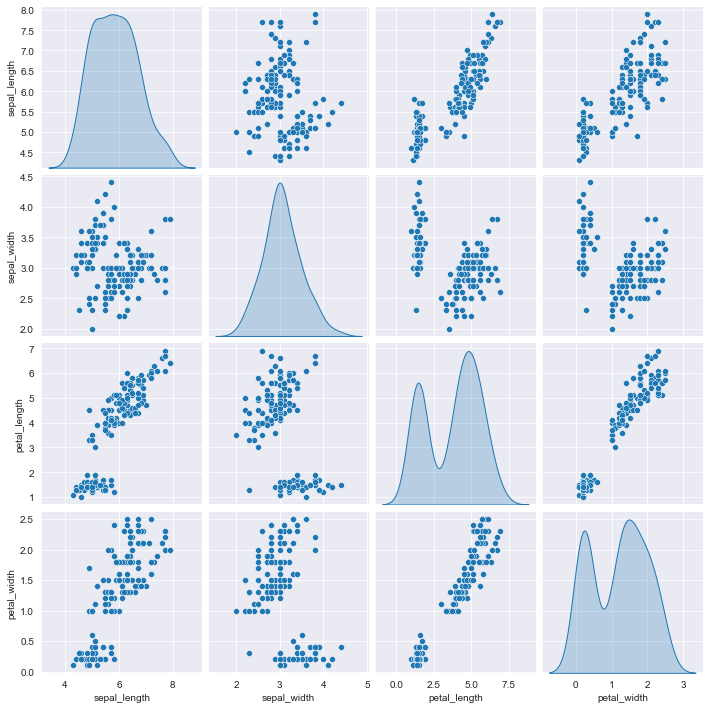

In [79]:
sns.pairplot(df1,diag_kind='kde');

**From the above pairplot we can observe that the cluster formed will be atleast 2.**

# Scaling the data

In [80]:
# use 'StandardScaler' to transform data into standard form
# store the transformed data in the variable 'scaled_features' 
scaled_features= StandardScaler().fit_transform(df1)

In [81]:
# convert the array back to a dataframe
df2= pd.DataFrame(scaled_features,columns=df1.columns)

In [82]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [83]:
# Finding optimal cluster size for KMeans
# Calculating MSE for various cluster sizes

n_clusters = range(1,10,1)
mse = []

for i in n_clusters:
    km = KMeans(n_clusters=i)
    km_model1 = km.fit(df2)
    error = km_model1.inertia_
    
    mse.append(error)
    
df_inertia = pd.DataFrame({'No of clusters':n_clusters,'Inertia':mse})
df_inertia

,No of clusters,Inertia
0,1,600.000000
1,2,222.361705
2,3,139.820496
3,4,114.304803
4,5,90.927295
5,6,79.998867
6,7,71.822032
7,8,62.970045
8,9,55.335521


**The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.**

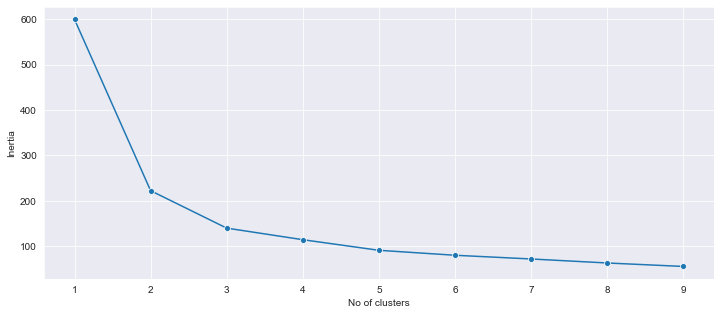

In [84]:
# Elbow plot
# Plotting the df_inertia 
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
sns.lineplot(df_inertia['No of clusters'],df_inertia['Inertia'],marker='o')
plt.show()

**You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 
From this we choose the number of clusters as 3**

In [85]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
kmeans_model = kmeans.fit(df2)
y_pred=kmeans_model.predict(df2)

In [86]:
# creating a new column 'Label' which stores the values of cluster 
# create copy of df2 dataframe
data=df2.copy()
data['label']= y_pred
data['label'].value_counts()

0    53
1    50
2    47
Name: label, dtype: int64

**From the above result we can observe that value_counts of distict species is not same as the value_counts we had earlier only 
label 1 is the cluster which contains same records as earlier but label 0 and label 2 are not same.**

                                                  **THANKYOU**